In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras


  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=39985ed086bd5b7e2271b84b6c8396fa6f53fb1a38a1b03e19140208fa45f767
  Stored in directory: c:\users\abc\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf589049

In [ ]:
### Data Processing

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values


In [6]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping
# batch size, time step, and new dimension(new indicator)
# able to add more dimensions to include other indicators such as other companys' stock
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [11]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [12]:
### Build the RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Initialize the RNN
regressor = tf.keras.models.Sequential()

In [14]:
# Add the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Add the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Add the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Add the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Add the output layer
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 119ms/step - loss: 0.0459
Epoch 2/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0038
Epoch 13/100

38/38 [==============================] - 5s 119ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0014


In [21]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# reshape(1,-1) means 1 row and unknown number of columns that the numpy will figure out
# ex) z.shape = (3,4) and z.reshape(1,-1) gives (1,12) 'Flattening the Dataframe'

inputs = inputs.reshape(-1,1)
# Scale the inputs
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[779.20026],
       [776.4633 ],
       [777.0523 ],
       [778.404  ],
       [781.80817],
       [787.7666 ],
       [792.8238 ],
       [794.55786],
       [794.7892 ],
       [794.5767 ],
       [794.374  ],
       [794.1448 ],
       [794.02496],
       [794.6733 ],
       [795.6541 ],
       [800.57666],
       [807.3947 ],
       [814.4741 ],
       [817.8564 ],
       [812.92676]], dtype=float32)

<module 'matplotlib.pyplot' from 'C:\\Users\\ABC\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

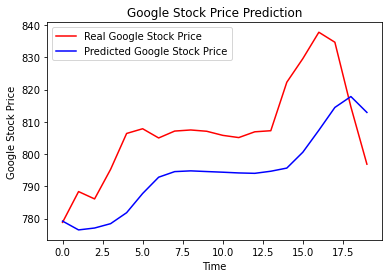

In [23]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt

In [ ]:
# Note that we didn't use RMSE for the model (regression) performance because we care more about the trend, not the error
# If you want to use the RMSE, use the relative error, rather than the absolute error 
# by dividing RMSE by the range of the Stock Price Values (around 800)
# because RMSE of 50 is larger when value is 100 than 10000.


In [ ]:
##### Try adding extra dimensions ######